Begin October 4 2019
Author Rhondene Wint
## Expected Frequency distribution of nested intronic tRNAs using Spatial Point Pattern Analysis

- Modelling spatial point data is popular in ecology, epidemiology, forensics and geomatics.
- I will model the expected frequency distribution of nested tRNAs inside introns as a Poisson spatial process. Specifically, <b> a complete spatial process </b>.
- <b> Complete Spatial Process </b> makes two assumptions: 1) Uniform or equal probability of points occuring in all positions 2) Independece of point positions. CSR makes a useful starting theoretical or null hypothesis. However, most real-life processes that generate spatial processes do no not meat these assumptions. tRNAs are no exception.
- The actual tRNA locations would probably be tter modelled with a <b> Inhomogeneous Poisson Process</b> that allows for first order effects that takes into account that probability of event occuring changes over space.
- CSR can modelled by sampling from a uniform distribution or better yet a Poisson distribution. The laplace principle states that each region has equal probability of 

### Poisson Distribution for Complete Spatial Randomness

<i>tRNAs are like mobile elements and can be retroposition to anywhere in the genome. Is the occurrence of 130 tRNAs in intronic regions is due to randomness?</i >or  
<i> are tRNAs randomly distributed among introns of the host genes?</i>

The expected proportion of quadrats/cells/windows with k events occuring is approximated by a Poisson distribution:
<b>P(k) = lamba<sup>k</sup> e <sup> -lambda</sup> / K!</b>. Lambda is the average occurences per spatial unit that is claculated from the data. Eg 2 tRNAs per 200Mb in the genome.
- E.g. given an oberved density of 1 tRNAs per 100Mb, what is the expectation that an intron of window size q has 13 tRNAs?
- 

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### But first model expected frequency of nested trnas as binomial  random variable:
- I found 130 tRNAs nested inside introns. There are total 290 nuclear tRNAs in drosophila
- prob of a trna nesting inside an intron is equal to the of fraction of genome that intronic which 0.46

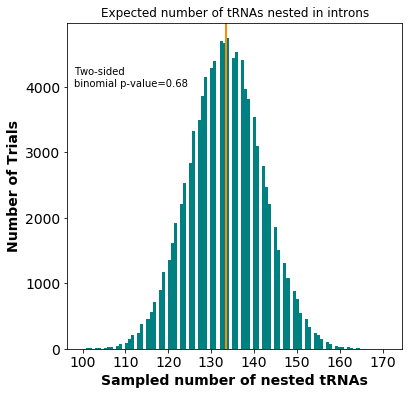

In [43]:
##expected number of nested trnas: 290 total nuclear trnas, intronic region is 0.46 of genome, 10000 tests
trnas=np.random.binomial(290,0.46,100000)

plt.figure(figsize=(6,6))
plt.axvline(np.mean(trnas), color='darkorange',linewidth=2)
plt.hist(trnas, bins=100, color='teal')
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.xlabel('Sampled number of nested tRNAs',fontsize=14, fontweight='bold')
plt.ylabel('Number of Trials',fontsize=14,fontweight='bold')
plt.title("Expected number of tRNAs nested in introns")
plt.text(98,4000,'Two-sided \nbinomial p-value=0.68')
plt.show()

In [11]:
##two-sided binomial hypothesis test
from scipy.stats import binom_test
binom_test(x=130,n=290,p=0.46,alternative='two-sided')   

0.7238399965084523

Indeed the given the area occupied by introns, the occurence of 130 trnas inside intronic regions follows random expectation
## Now, resume using spatial point pattern to model trna locations along introns
- Intron researchers hypothesise that the 5' most intron is on average the longest because it holds regulatory cis elements.
- How are nested tRNAs distributed among introns in the host gene? Are they uniform or ?

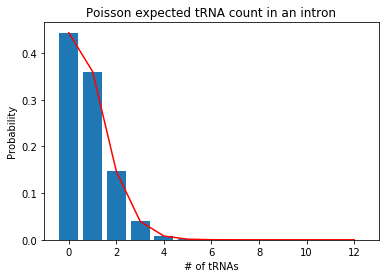

In [24]:
## if a gene has 16 introns, 13 trnas what is the probability of single intron hosting 5 trnas
from scipy.stats import poisson 
##plot the probs of trna occruence
probs = []
for i in range(13):
    probs.append(poisson.pmf(i,(13/16)))
len(probs)
plt.bar(np.arange(13),probs)
plt.plot(np.arange(13),probs,color='red')
plt.title('Poisson expected tRNA count in an intron')
plt.xlabel('# of tRNAs'); plt.ylabel('Probability')
plt.show()

- Having computing the expected frequecny of intronic trnas as binomial random variable, I will now modelling the expected frequency of trnas within host genes as a multinomial variable based on <b> spatial poisson point process </b>
deviation of trnas from expected count values under uniform or even proportional dist is evidence that trnas arise by tandem duplication not de novo
- the prb of a trna being found in a particular intron equals
    the proportion of that intron to total introns.

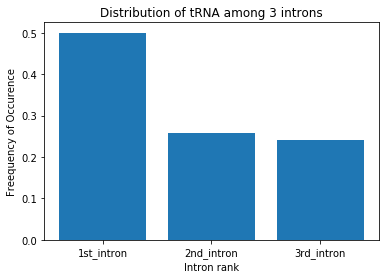

In [27]:
##start with modelling tRNA origin in introns as simple multinomial variable
def intron_loc(in1,in2):
    """inputs: relative lenghts of introns to total introns"""
    trna = np.random.uniform(0,1) #trna origin is a uniform variable
    if trna <in1:   #if it falls within the 1st intron size then it is assign there
        return('1st_intron')
    if trna <in1+in2: 
        return('2nd_intron')
    else: return('3rd_intron')

##simulations of a trna events
locs = []
for i in range(10000):
    locs.append(intron_loc(0.5,0.25)) #1st intron 0.5, 2nd and 3rd is 0.25
##plot the distribution of trna along the introns
plt.bar(['1st_intron','2nd_intron','3rd_intron'],
        np.asarray([locs.count('1st_intron'),locs.count('2nd_intron'), locs.count('3rd_intron')])/10000)
plt.title('Distribution of tRNA among 3 introns')
plt.xlabel('Intron rank'); plt.ylabel('Freequency of Occurence')
plt.show()

In [36]:
## a more convient implementation
def random_trna_loc(intron_probs):
    """Input:
    intron_probs: list of fraction of each intron """
    pmass = intron_probs
    loc=0  ##0 is the first intron
    intron= pmass[0]
    trna = np.random.uniform(0,1)
    ##enter while if the trna location is greater than the intron size
    while(trna>intron):
        loc = loc+1
        intron = intron+pmass[loc]
    return loc 

In [37]:
intron_probs=[0.5,0.25,0.25]
locs = []
for i in range(10000):
    locs.append(random_trna_loc(intron_probs))

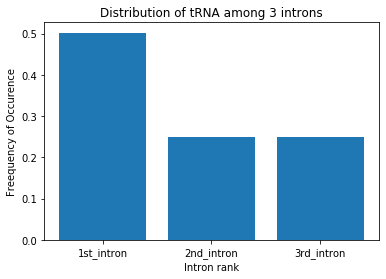

In [42]:
plt.bar(['1st_intron','2nd_intron','3rd_intron'],
        np.asarray([locs.count(0),locs.count(1), locs.count(2)])/10000)
plt.title('Distribution of tRNA among 3 introns')
plt.xlabel('Intron rank'); plt.ylabel('Freequency of Occurence')
plt.show()

### do an example with the EcR host gene that has 13 tRNAs

<img src='../Ardell_lab/trnas_CDS_introns/EcR_view.gif'>